In [211]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
df=pd.read_csv(r'AAPL.csv')
df.head(5)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1


In [212]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1


In [213]:
df1=df.reset_index()['close']


In [214]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

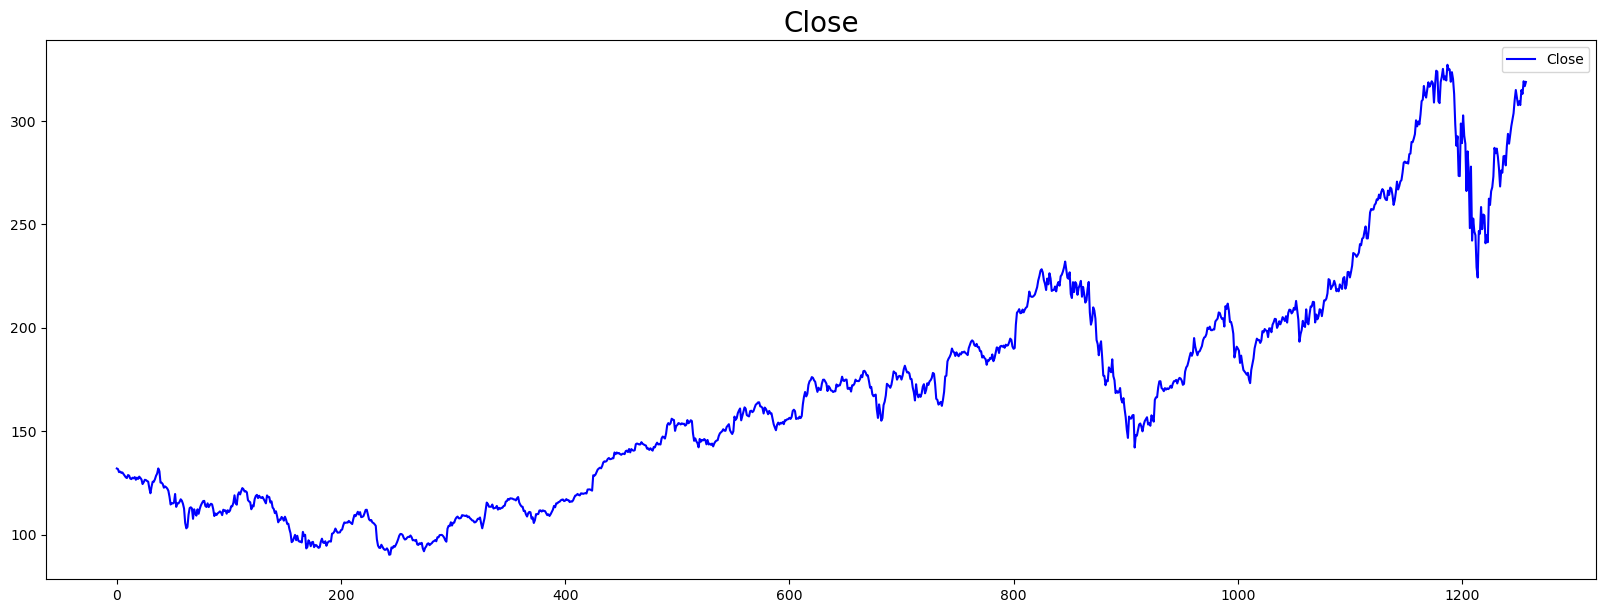

In [216]:
plt.figure(figsize=(20,7))
plt.plot(df1,label='Close',color='blue')
plt.title("Close", size=20)
plt.legend()
plt.show()

In [218]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [220]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


(None,)

In [221]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [223]:
training_size,test_size

(817, 441)

In [225]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [226]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [227]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [228]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [232]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [234]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [235]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 145ms/step - loss: 0.0188 - val_loss: 0.0394
Epoch 2/100
12/12 [==============================] - 1s 91ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 3/100
12/12 [==============================] - 1s 98ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 4/100
12/12 [==============================] - 1s 93ms/step - loss: 7.5940e-04 - val_loss: 0.0036
Epoch 5/100
12/12 [==============================] - 1s 93ms/step - loss: 6.4201e-04 - val_loss: 0.0050
Epoch 6/100
12/12 [==============================] - 1s 89ms/step - loss: 6.2243e-04 - val_loss: 0.0037
Epoch 7/100
12/12 [==============================] - 1s 107ms/step - loss: 6.0955e-04 - val_loss: 0.0039
Epoch 8/100
12/12 [==============================] - 1s 106ms/step - loss: 5.8505e-04 - val_loss: 0.0036
Epoch 9/100
12/12 [==============================] - 1s 94ms/step - loss: 5.6772e-04 - val_loss: 0.0033
Epoch 10/100
12/12 [==============================] - 1s 99ms/step - loss

In [236]:
#model.fit(ox_train,ox_train,validation_data=(ox_test,oytest),epochs=100,batch_size=64,verbose=1)

In [259]:
import tensorflow as tf

In [260]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 18ms/step


In [261]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [262]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.03873676856875

In [241]:
math.sqrt(mean_squared_error(ytest,test_predict))

236.35822938255097

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


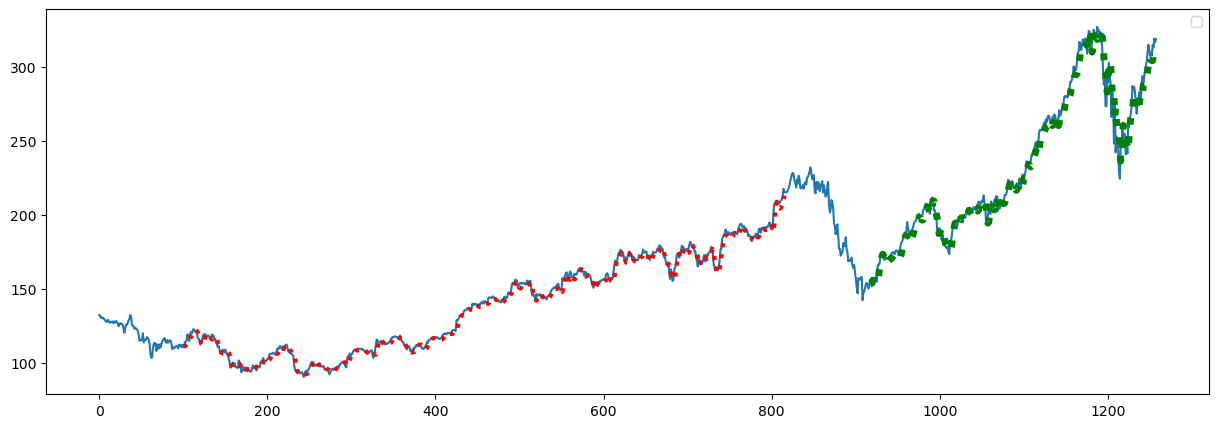

In [279]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot,color='red',ls=':',lw=3)
plt.plot(testPredictPlot, color='green',ls= ':',lw= 5)
plt.legend()
plt.show()

In [320]:
len(test_data)

441

In [321]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [322]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [359]:
temp_input[:10]

[1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644]

In [324]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.947656]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90

In [326]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

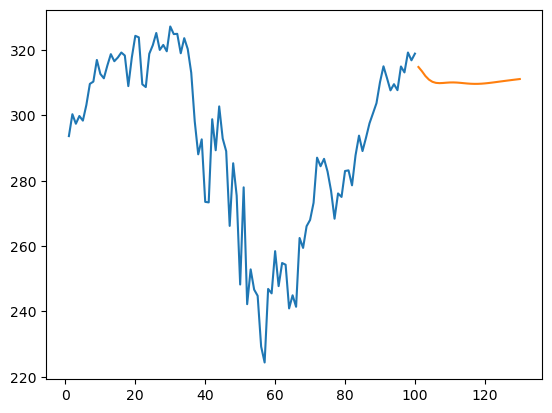

In [327]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

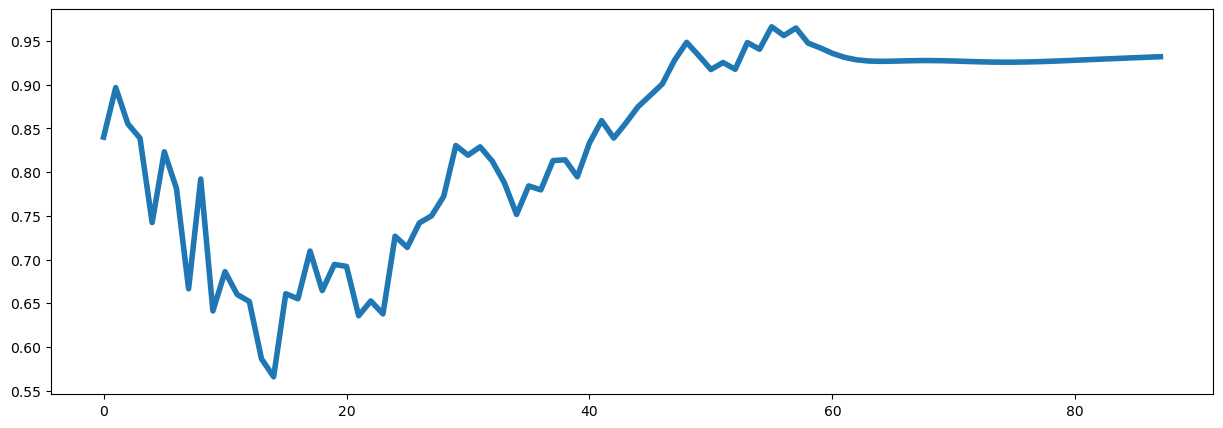

In [328]:
df3=df1.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,5))
plt.plot(df3[1200:],lw=4)

In [331]:
final_graph = scaler.inverse_transform(df1).tolist()
stock_symbol= "AAPL"

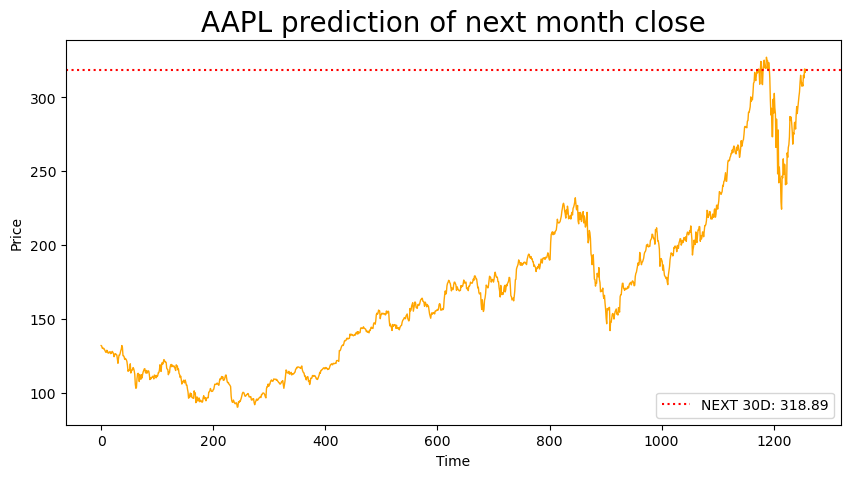

In [333]:
plt.figure(figsize=(10,5))
plt.plot(final_graph,lw=1,ls='-',c='orange')
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month close".format(stock_symbol),size=20)
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', 
            label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()



##################################################################################################################
# Now for opening stock price of AAPL

In [412]:
dfo=df.reset_index()['open']

In [413]:
dfo

0       130.34
1       131.86
2       131.23
3       131.20
4       129.86
         ...  
1253    313.17
1254    315.03
1255    316.68
1256    318.66
1257    315.77
Name: open, Length: 1258, dtype: float64

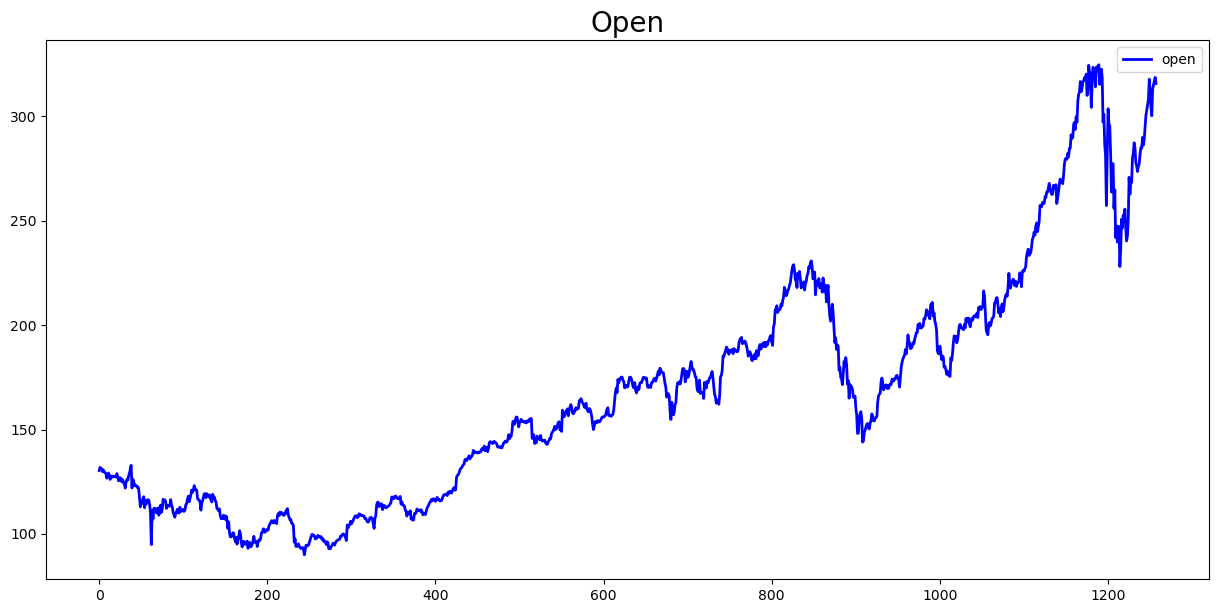

In [414]:
plt.figure(figsize=(15,7))
plt.plot(dfo,label='open',color='blue',lw=2)
plt.title("Open", size=20)
plt.legend()
plt.show()

In [415]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dfo=scaler.fit_transform(np.array(dfo).reshape(-1,1))


In [416]:
otraining_size=int(len(dfo)*0.65)
otest_size=len(dfo)-training_size
otrain_data,otest_data=dfo[0:training_size,:],dfo[training_size:len(df1),:1]


In [417]:
otraining_size,otest_size

(817, 441)

In [418]:
time_step = 100
ox_train, oy_train = create_dataset(otrain_data, time_step)
ox_test, oytest = create_dataset(otest_data, time_step)
print(ox_train.shape), print(oy_train.shape)

(716, 100)
(716,)


(None, None)

In [419]:
print(ox_test.shape), print(oytest.shape)

(340, 100)
(340,)


(None, None)

In [421]:
ox_train =ox_train.reshape(ox_train.shape[0],ox_train.shape[1] , 1)
ox_test = ox_test.reshape(ox_test.shape[0],ox_test.shape[1] , 1)


In [345]:
model.fit(ox_train,ox_train,validation_data=(ox_test,oytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 89ms/step - loss: 0.0022 - val_loss: 0.0239
Epoch 2/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 3/100
12/12 [==============================] - 1s 98ms/step - loss: 0.0017 - val_loss: 0.0111
Epoch 4/100
12/12 [==============================] - 1s 93ms/step - loss: 0.0016 - val_loss: 0.0114
Epoch 5/100
12/12 [==============================] - 1s 94ms/step - loss: 0.0015 - val_loss: 0.0223
Epoch 6/100
12/12 [==============================] - 1s 92ms/step - loss: 0.0015 - val_loss: 0.0323
Epoch 7/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0013 - val_loss: 0.0454
Epoch 8/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0013 - val_loss: 0.0338
Epoch 9/100
12/12 [==============================] - 1s 93ms/step - loss: 0.0012 - val_loss: 0.0504
Epoch 10/100
12/12 [==============================] - 1s 94ms/step - loss: 0.0011 - val_loss: 0.0434

In [422]:
otrain_predict=model.predict(ox_train)
otest_predict=model.predict(ox_test)

11/11 [==============================] - 0s 16ms/step


In [423]:
otrain_predict=scaler.inverse_transform(otrain_predict)
otest_predict=scaler.inverse_transform(otest_predict)

In [424]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(oy_train,otrain_predict))

136.17596357392668

In [425]:
math.sqrt(mean_squared_error(oytest,otest_predict))

196.3148548953729

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


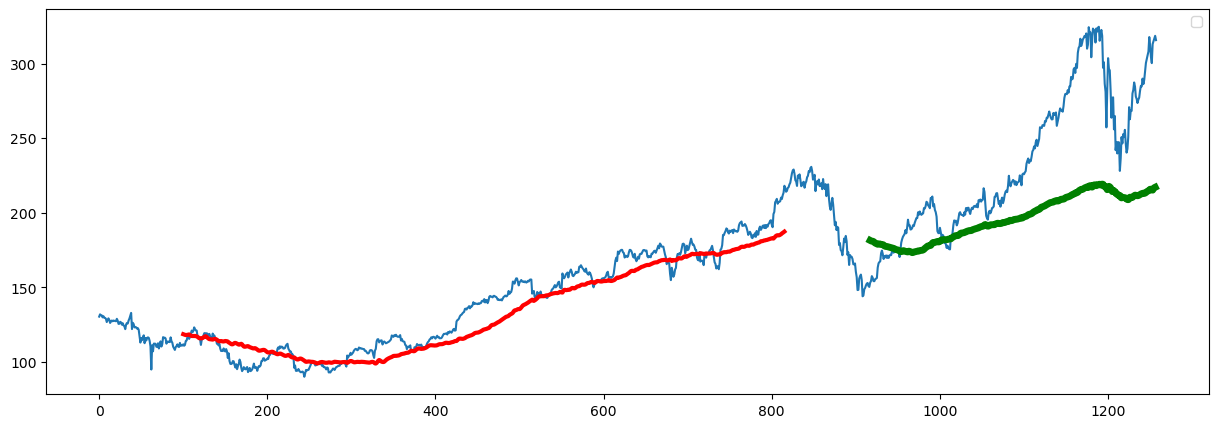

In [426]:
look_back=100
otrainPredictPlot = np.empty_like(dfo)
otrainPredictPlot[:, :] = np.nan
otrainPredictPlot[look_back:len(train_predict)+look_back, :] = otrain_predict
# shift test predictions for plotting
otestPredictPlot = np.empty_like(dfo)
otestPredictPlot[:, :] = np.nan
otestPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = otest_predict
# plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(dfo))
plt.plot(otrainPredictPlot,color='red',lw=3)
plt.plot(otestPredictPlot, color='green',lw= 5)
plt.legend()
plt.show()

In [427]:
len(otest_data)

441

In [428]:
ox_input=otest_data[341:].reshape(1,-1)
ox_input.shape

(1, 100)

In [429]:
otemp_input=list(ox_input)
otemp_input=otemp_input[0].tolist()

In [430]:
otemp_input[:10]

[0.8517445575767905,
 0.8786265070506539,
 0.8825033016657436,
 0.868188983086951,
 0.8939632769565032,
 0.8825459038043711,
 0.9254675584714352,
 0.9398031781195416,
 0.9442338005367868,
 0.9657904826822307]

In [479]:
from numpy import array

ost_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(otemp_input)>100):
        #print(temp_input)
        ox_input=np.array(otemp_input[1:])
        print("{} day input {}".format(i,ox_input))
        ox_input=ox_input.reshape(1,-1)
        ox_input = ox_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(ox_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        otemp_input.extend(yhat[0].tolist())
        otemp_input=otemp_input[1:]
        #print(temp_input)
        ost_output.extend(yhat.tolist())
        i=i+1
    else:
        ox_input = ox_input.reshape((1, n_steps,1))
        yhat = model.predict(ox_input, verbose=0)
        print(yhat[0])
        otemp_input.extend(yhat[0].tolist())
        print(len(otemp_input))
        ost_output.extend(yhat.tolist())
        i=i+1
    

print(ost_output)

0 day input [0.99769948 1.         0.9600818  0.97984919 0.99105355 0.97397009
 0.88297193 0.89869211 0.83725983 0.81412687 0.71256337 0.81915392
 0.9102799  0.87947855 0.87555915 0.81796106 0.74021216 0.79725642
 0.79832148 0.70693989 0.7450688  0.6473395  0.67102629 0.63805223
 0.67049376 0.66962041 0.58825033 0.6235249  0.68482938 0.66680867
 0.69334981 0.68478678 0.70549142 0.66672347 0.64048055 0.65096068
 0.68546841 0.77024667 0.73590934 0.76130022 0.75963873 0.80944063
 0.81966515 0.84088101 0.82942104 0.8007072  0.79359264 0.78221787
 0.79184595 0.79751204 0.81710902 0.83108252 0.82959145 0.85187236
 0.83606697 0.8485068  0.87359945 0.89660461 0.9083628  0.91867252
 0.92915264 0.97060452 0.94640651 0.91385848 0.89613599 0.95075193
 0.95867593 0.96570528 0.9741405  0.96182848 0.54190183 0.52231622
 0.51460755 0.51333803 0.51316065 0.5119375  0.50935668 0.50584292
 0.50196975 0.498191   0.49477378 0.49182671 0.48934773 0.48727667
 0.48553109 0.48402843 0.48269728 0.48148006 0.480

In [481]:
oday_new=np.arange(1,101)
oday_pred=np.arange(101,131)
plt.plot(oday_pred,scaler.inverse_transform(ost_output))
plt.plot(oday_new,scaler.inverse_transform(dfo[1158:]))

In [482]:
dfo

array([[0.17185703],
       [0.17833255],
       [0.17564862],
       ...,
       [0.96570528],
       [0.9741405 ],
       [0.96182848]])

In [483]:
ofinal_graph = scaler.inverse_transform(dfo).tolist()
stock_symbol= "AAPL"

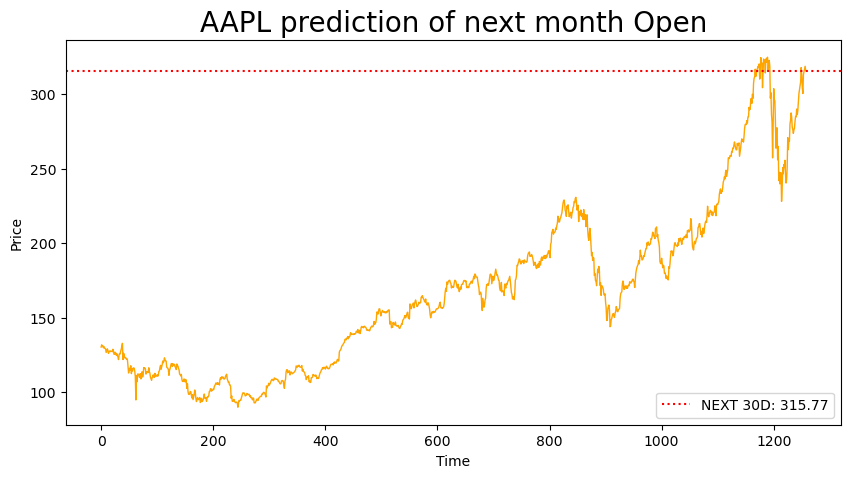

In [484]:
plt.figure(figsize=(10,5))
plt.plot(ofinal_graph,lw=1,ls='-',c='orange')
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month Open".format(stock_symbol),size=20)
plt.axhline(y=ofinal_graph[len(ofinal_graph)-1], color = 'red', linestyle = ':', 
            label = 'NEXT 30D: {0}'.format(round(float(*ofinal_graph[len(ofinal_graph)-1]),2)))
plt.legend()

# Now plotting the actual and predicted 

In [485]:
tp=test_predict
type(tp)


numpy.ndarray

In [486]:
otp=otest_predict
type(otp)

numpy.ndarray

In [487]:
tp = tp.astype(np.float64)
type(tp)

numpy.ndarray

In [488]:
otp = otp.astype(np.float64)
type(otp)


numpy.ndarray

In [489]:
dfn = df[['date','open','close']] 
dfn['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) 
dfn.head(10)

,date,open,close
0,2015-05-27,130.34,132.045
1,2015-05-28,131.86,131.780
2,2015-05-29,131.23,130.280
3,2015-06-01,131.20,130.535
4,2015-06-02,129.86,129.960
5,2015-06-03,130.66,130.120
6,2015-06-04,129.58,129.360
7,2015-06-05,129.50,128.650
8,2015-06-08,128.90,127.800
9,2015-06-09,126.70,127.420


In [490]:
df_m = pd.concat([dfn.iloc[-340:].copy(),
                          pd.DataFrame(tp,columns=['close_predicted'],
                                       index=df.iloc[-340:].index)], axis=1)

df_m.head(5)


,date,open,close,close_predicted
918,2019-01-17,154.20,155.86,153.143295
919,2019-01-18,157.50,156.82,153.324005
920,2019-01-22,156.41,153.30,154.296280
921,2019-01-23,154.15,153.92,155.613052
922,2019-01-24,154.11,152.70,155.442429


In [491]:
df_o = pd.concat([dfn.iloc[-340:].copy(),
                          pd.DataFrame(otp,columns=['open_predicted'],
                                       index=df.iloc[-340:].index)], axis=1)

df_o.head(5)

,date,open,close,open_predicted
918,2019-01-17,154.20,155.86,181.458084
919,2019-01-18,157.50,156.82,181.162735
920,2019-01-22,156.41,153.30,180.970306
921,2019-01-23,154.15,153.92,180.890549
922,2019-01-24,154.11,152.70,180.641785


In [492]:
df_o.set_index('date',drop=True,inplace=True)

In [493]:
df_m.set_index('date',drop=True,inplace=True)

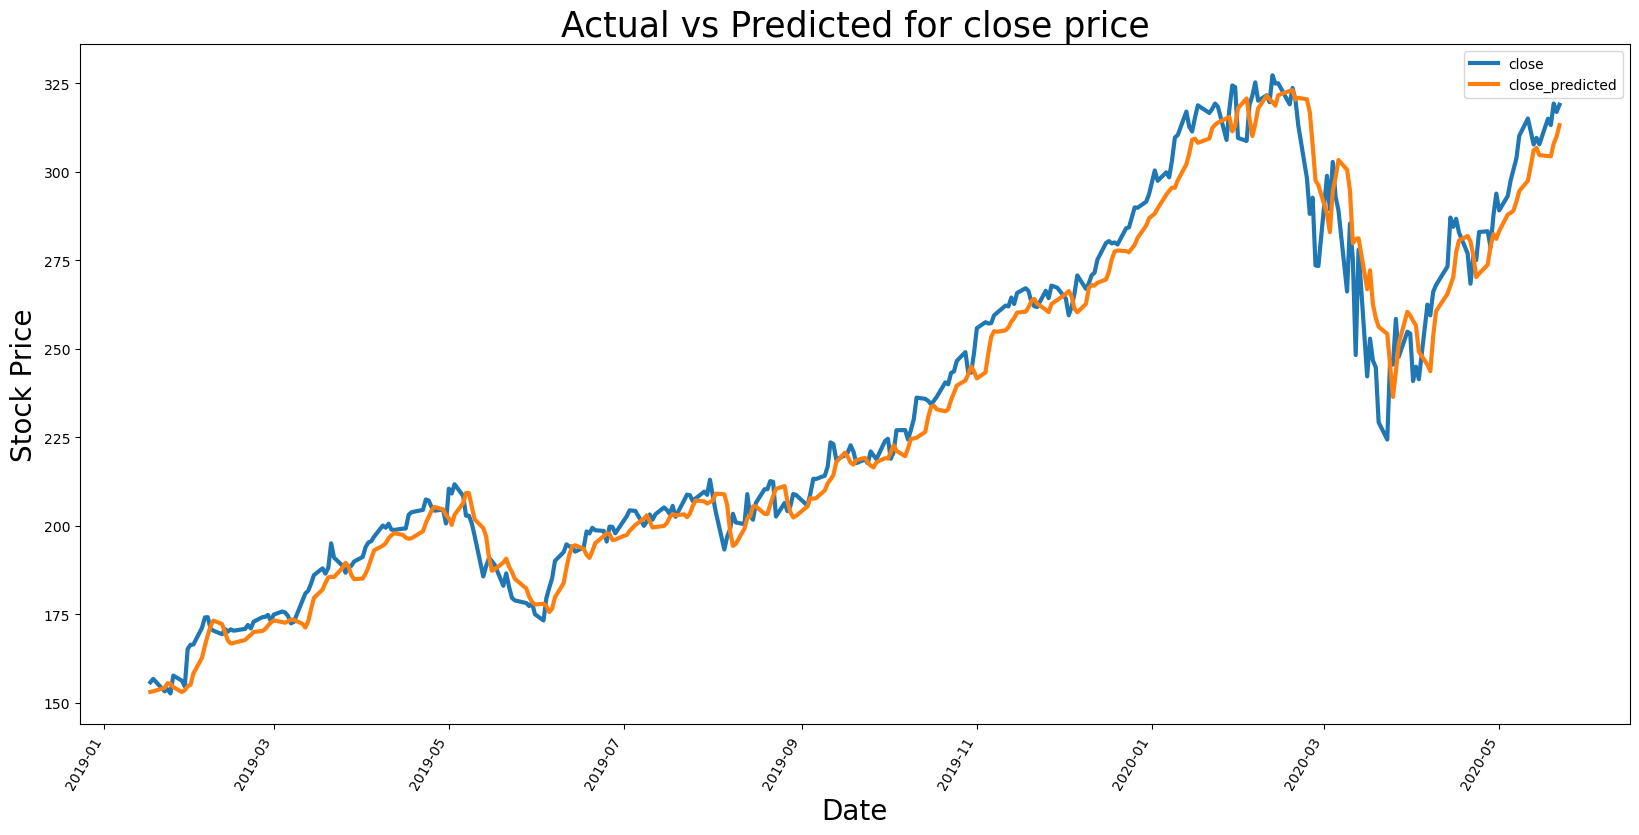

In [494]:
df_m[['close','close_predicted']].plot(figsize=(20,10),lw=3)
plt.xticks(rotation=60)
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Actual vs Predicted for close price',size=25)
plt.legend()
plt.show()



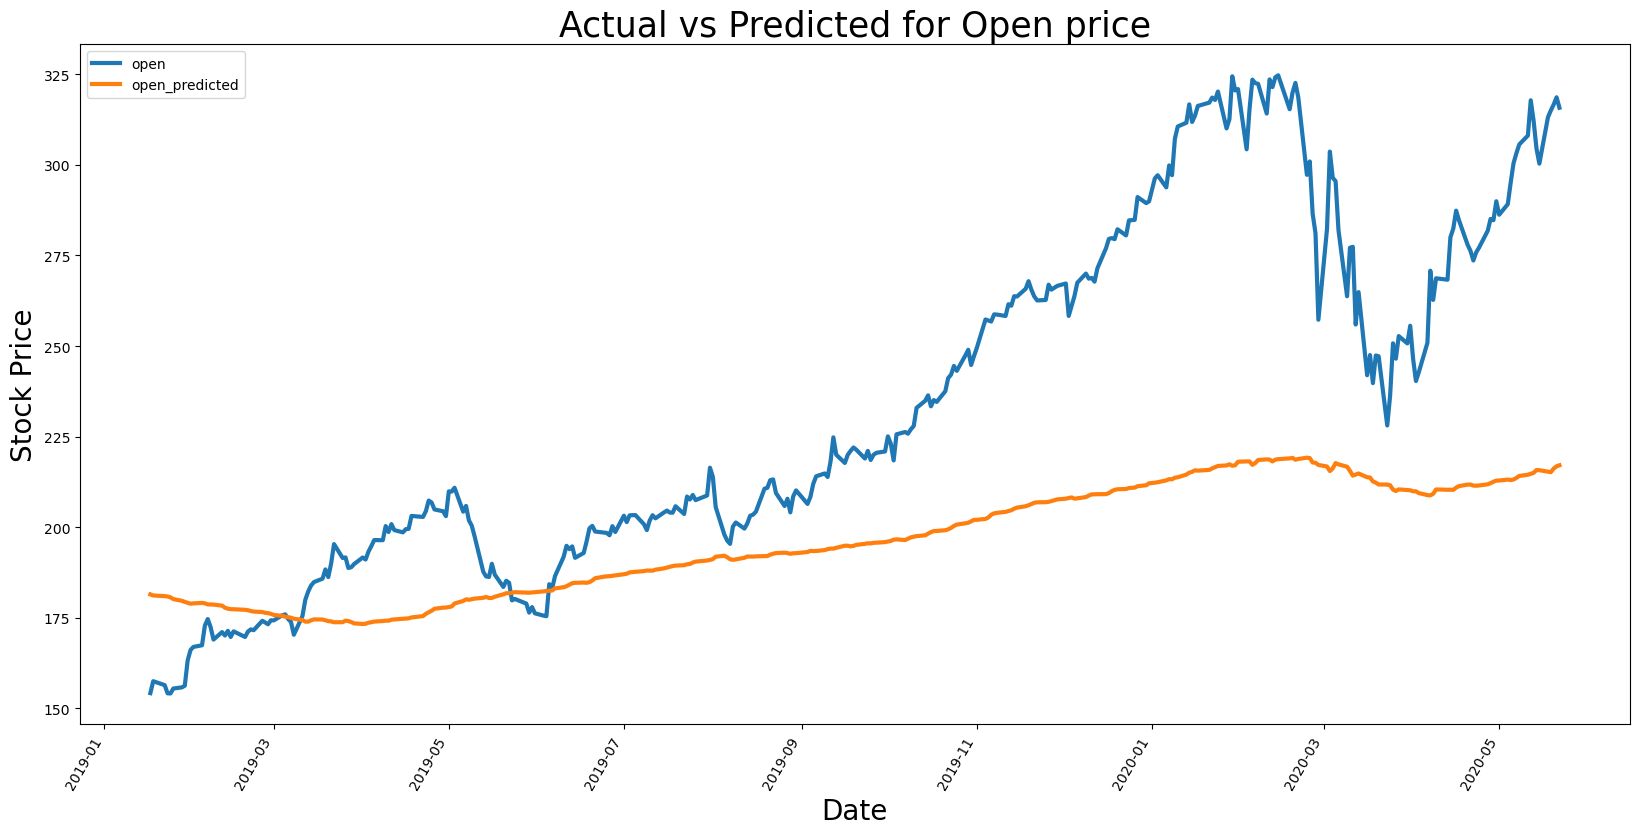

In [495]:
df_o[['open','open_predicted']].plot(figsize=(20,10),lw=3)
plt.xticks(rotation=60)
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Actual vs Predicted for Open price',size=25)
plt.legend()
plt.show()
